In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('C:/Deloitte Folder/ML/Decision Trees/Social_Network_Ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
x=data.iloc[:,2:4].values
y=data.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

#### Scaling needs to be done only after splitting into testing and training dataset beacuse the value of mean and sigma of the training DS changes as there are less number of rows when compared as a whole. If performed before splitting then the accuracy of the modle is affected. 

#### Fit_transform for training(Calulate and apply the parametrics to train) and transform for testing(apply the previously calculated fit for test)

In [8]:
# performing feature scaling on only age and salary column. 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
#training the decision tree moel using decision tree classifier using gini index
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=1)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [80]:
# testing the model
y_pred = classifier.predict(x_test)

In [81]:
# using confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(cm)
print(acc*100)

[[63  9]
 [12 36]]
82.5


In [83]:
#training the decision tree moel using decision tree classifier using entropy
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion='entropy',random_state=1)
classifier1.fit(x_train,y_train)
cm1=confusion_matrix(y_test,y_pred)
acc1=accuracy_score(y_test,y_pred)
print(cm1)
print(acc1*100)

[[63  9]
 [12 36]]
82.5


In [84]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [90]:
# making the predictions on age as 30 and salary as 80k
print(classifier.predict(sc.transform([[30,80000]])))

[0]


## K-Nearest Neighbour

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
# making the predictions on age as 30 and salary as 80k
print(knn.predict(sc.transform([[30,80000]])))

[0]


### Measuring the Training and Testing score

In [20]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)


Text(0, 0.5, 'Accuracy')

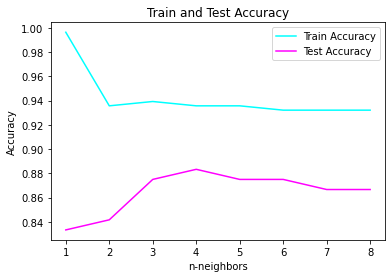

In [23]:
plt.plot(neighbors,train_accuracy,color='cyan',label='Train Accuracy')
plt.plot(neighbors,test_accuracy,color='magenta',label='Test Accuracy')
plt.legend()

plt.title('Train and Test Accuracy')
plt.xlabel('n-neighbors')
plt.ylabel('Accuracy')